# VAR Example Fed

by **Professor Throckmorton**  
for *Time Series Econometrics*  
W&amp;M ECON 408/PUBP 616  

## Summary

- {cite:ps}`ChristianoEtAl2005`: Christiano, Eichenbaum, and Evans "Nominal Rigidities and the Dynamic Effects of a Shock to Monetary Policy" (*Journal of Polical Economy*, 2005) has over 9,000 citations (astronomical!) according to google scholar.
- Let $\mathbf{Y}_t$ denote variables observed between 1965Q3 to 1995Q3,

  \begin{gather*}
    \mathbf{Y}_t = [\mathbf{Y}_{1t}, R_t, \mathbf{Y}_{2t}]'
  \end{gather*}
  
  $\mathbf{Y}_{1t}$: real GDP, real consumption, GDP deflator, real investment, real wages, and labor productivity  
  
  $R_t$: federal funds rate
  
  $\mathbf{Y}_{2t}$: real profits, M2 growth rate

## Assumptions

- $R_t$ appears after $\mathbf{Y}_{1t}$, i.e., the assumption is that none of the variables in $\mathbf{Y}_{1t}$ respond contemporaneously to $R_t$, so the real economy lags behind monetary policy (citing Friedman)
- "All these variables, except money growth, have been natural logged."
- "With one exception (the growth rate of money), all the variables in are included in levels."
- "The VAR contains four lags of each variable, and the sample period
is 1965:3–1995:3."

## Read Data

In [1]:
# Libraries
from fredapi import Fred
import pandas as pd
# Setup acccess to FRED
fred_api_key = pd.read_csv('fred_api_key.txt', header=None)
fred = Fred(api_key=fred_api_key.iloc[0,0])
# Series to get
series = ['GDP','PCE','GDPDEF','GPDI','COMPRNFB','OPHNFB','FEDFUNDS','CP','M2SL']
rename = ['gdp','cons','price','inv','wage','prod','ffr','profit','money']
# Get and append data to list
dl = []
for idx, string in enumerate(series):
    var = fred.get_series(string).to_frame(name=rename[idx])
    dl.append(var)
    print(var.head(2)); print(var.tail(2))

            gdp
1946-01-01  NaN
1946-04-01  NaN
                  gdp
2025-01-01  29962.047
2025-04-01  30331.117
             cons
1959-01-01  306.1
1959-02-01  309.6
               cons
2025-05-01  20615.2
2025-06-01  20685.2
             price
1947-01-01  11.141
1947-04-01  11.299
              price
2025-01-01  127.429
2025-04-01  128.059
            inv
1939-01-01  NaN
1939-04-01  NaN
                 inv
2025-01-01  5595.694
2025-04-01  5372.966
              wage
1947-01-01  34.386
1947-04-01  34.670
               wage
2024-10-01  108.178
2025-01-01  108.496
              prod
1947-01-01  22.256
1947-04-01  22.762
               prod
2024-10-01  115.725
2025-01-01  115.303
             ffr
1954-07-01  0.80
1954-08-01  1.22
             ffr
2025-05-01  4.33
2025-06-01  4.33
            profit
1946-01-01     NaN
1946-04-01     NaN
              profit
2024-10-01  3631.383
2025-01-01  3602.551
            money
1959-01-01  286.6
1959-02-01  287.7
              money
2025-05-01  21

In [2]:
# Concatenate data to create data frame (time-series table)
raw = pd.concat(dl, axis=1).sort_index()
# Resample/reindex to quarterly frequency
raw = raw.resample('QE').last().dropna()
# Display dataframe
display(raw)

gdp     cons    price       inv     wage     prod   ffr  \
1959-03-31    510.330    312.7   15.224    83.166   49.137   31.034  2.80   
1959-06-30    522.653    318.2   15.248    89.381   49.471   31.336  3.39   
1959-09-30    525.034    324.2   15.307    83.606   49.502   31.379  3.76   
1959-12-31    528.600    322.9   15.367    86.524   49.672   31.277  3.99   
1960-03-31    542.648    330.2   15.428    96.476   50.690   32.007  3.84   
...               ...      ...      ...       ...      ...      ...   ...   
2024-03-31  28624.069  19553.2  124.163  5159.903  107.989  113.845  5.33   
2024-06-30  29016.714  19747.5  124.943  5297.844  107.562  114.430  5.33   
2024-09-30  29374.914  20044.1  125.532  5345.165  107.543  115.241  5.13   
2024-12-31  29723.864  20408.1  126.257  5288.763  108.178  115.725  4.48   
2025-03-31  29962.047  20578.5  127.429  5595.694  108.496  115.303  4.33   

              profit    money  
1959-03-31    32.706    289.2  
1959-06-30    35.446    294.1  
1959-09-30    32.441    296.7  
1959-12-31    31.960    297.8  
1960-03-31    34.614    299.3  
...              ...      ...  
2024-03-31  3314.945  20901.1  
2024-06-30  3413.018  21065.6  
2024-09-30  3402.982  21272.1  
2024-12-31  3631.383  21441.8  
2025-03-31  3602.551  21656.9  

[265 rows x 9 columns]

## Transform Data

In [3]:
# Scientific computing
import numpy as np
data = pd.DataFrame()
# log real GDP
data['gdp'] = 100*(np.log(raw['gdp']/raw['price']))
# log real Consumption
data['cons'] = 100*(np.log(raw['cons']/raw['price']))
# log price level
data['price'] = 100*np.log(raw['price'])
# log real Investment
data['inv'] = 100*(np.log(raw['inv']/raw['price']))
# log real Wage
data['wage'] = 100*(np.log(raw['wage']/raw['price']))
# log labor productivity
data['prod'] = 100*np.log(raw['prod'])
# log federal funds rate
data['ffr'] = 100*np.log(raw['ffr'])
# log real Profits
data['profit'] = 100*(np.log(raw['profit']/raw['price']))
# M2 growth rate
data['money'] = 100*(raw['money']/raw['money'].shift(1)-1)

In [4]:
# Christiano et al. (2005) sample
sample = data['09-30-1965':'09-30-1995']
display(sample)

gdp        cons       price         inv        wage  \
1965-09-30  381.006869  330.458073  280.910145  206.790340  122.363364   
1965-12-31  383.285180  331.896783  281.594750  208.003984  122.626131   
1966-03-31  385.693415  334.098399  282.233081  214.887041  122.783543   
1966-06-30  386.031488  333.386309  283.050379  213.583821  122.650228   
1966-09-30  386.873224  335.264086  284.013054  212.406981  122.249973   
...                ...         ...         ...         ...         ...   
1994-09-30  471.421551  428.548732  418.566193  294.663512   16.380277   
1994-12-31  472.561602  429.393768  419.106284  298.485983   16.161222   
1995-03-31  472.914588  429.752656  419.647988  299.463765   15.592482   
1995-06-30  473.213115  431.141418  420.126885  297.191369   15.181804   
1995-09-30  474.059760  431.510077  420.618404  296.643085   14.784170   

                  prod         ffr      profit     money  
1965-09-30  362.846575  139.128190  117.089792  2.135878  
1965-12-31  364.565875  146.325540  121.965505  2.157953  
1966-03-31  365.919314  153.901545  124.014461  1.742160  
1966-06-30  365.224140  164.287269  123.982126  0.856164  
1966-09-30  365.552947  168.639895  122.713398  0.891341  
...                ...         ...         ...       ...  
1994-09-30  412.626304  155.392520  192.242943  0.189682  
1994-12-31  413.679723  169.561561  194.694279  0.008606  
1995-03-31  413.742002  178.842057  197.218061  0.134810  
1995-06-30  414.211834  179.175947  201.596380  1.655639  
1995-09-30  414.202300  175.785792  202.686497  1.499056  

[121 rows x 9 columns]

## Non-stationarity

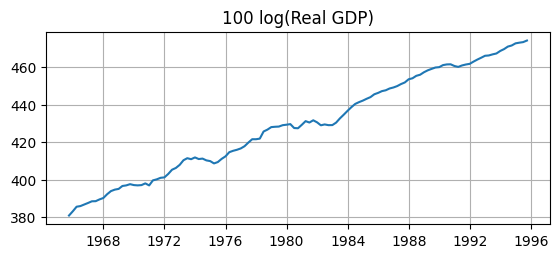

In [5]:
# Plotting
import matplotlib.pyplot as plt
# Plot GDP
fig, ax = plt.subplots(figsize=(6.5,2.5))
ax.plot(sample['gdp'])
ax.set_title('100 log(Real GDP)')
ax.grid()

- **Q:** Do these transformations make the data stationary? **A:** Clearly not.
- {cite:ps}`SimsEtAl1990`: Sims, Stock, and Watson "Inference in linear time series models with some unit roots" (*Econometrica*, 1990) find that VARs in levels can yield consistent impulse response functions even if the variables are non-stationary, I($1$), and **cointegrated**.
- Fortunately, Christiano et al. (2005) is only concerned with estimating IRFs.

### Cointegration

- Suppose you have two non-stationary time series: $y_t$ and $x_t$, both I($1$).
- Typically, any linear combination of them, $z_t = y_t - \beta x_t$, would also be non-stationary.
- But if some linear combination is **stationary**, then the variables are **cointegrated**.
- The coefficients (like $[1, -\beta]$) form a **cointegrating vector**.
- This implies the variables share a **stable long-run relationship** despite short-run fluctuations.

### Example

- Let $y_t$ be $\log(GDP)$ (i.e., income) and $x_t$ be $\log(PCE)$ (i.e., consumption)
- Both series are non-stationary, I($1$), because they have a stochastic time trend.
- There might exist a linear combination $z_t = y_t - \beta x_t$ that is stationary, I($0$), meaning
  - Income and consumption have a long-run linear relationship, i.e., they are **cointegrated**.
  - Deviations from the long-run are **mean-reverting**.

## Estimation

In [6]:
# VAR model
from statsmodels.tsa.api import VAR
# make the VAR model
model = VAR(sample)
# Estimate VAR(4)
results = model.fit(4)
# Assign impulse response functions (IRFs)
irf = results.irf(20)

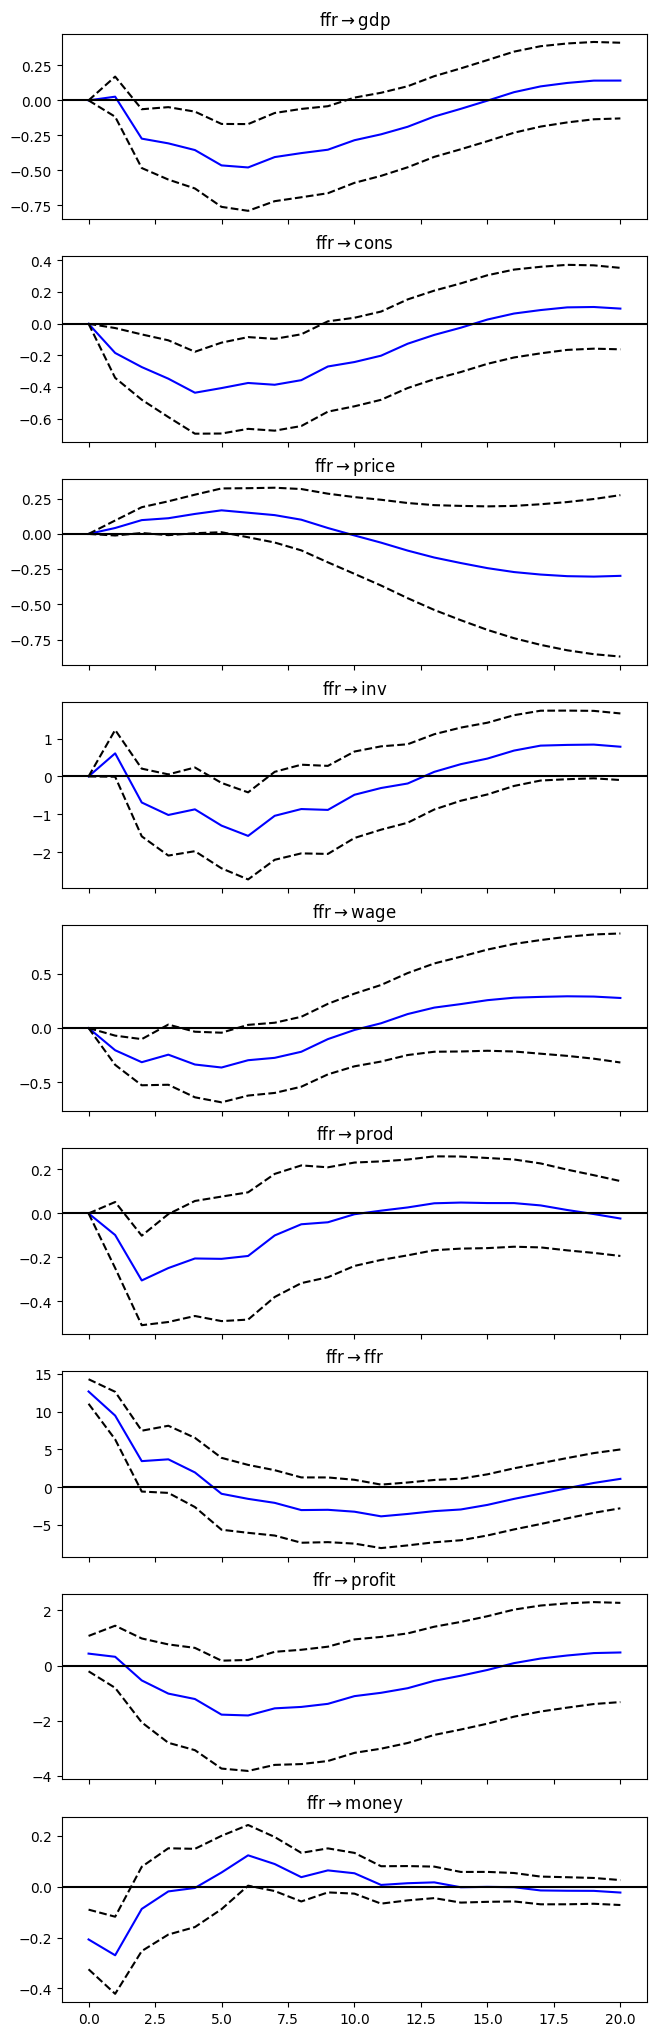

In [7]:
# Plot IRFs
plt = irf.plot(orth=True,impulse='ffr',figsize=(6.5,22.5));
plt.suptitle('');